# Anime Recommendation Systems

Anime Recommendation systems, dataset that used: [Anime Recommendations Database](https://www.kaggle.com/datasets/CooperUnion/anime-recommendations-database/data)

&nbsp;

## 1. Collaborative filtering
Simple recomendations system based on collaborative filtering that can gives recomendations based on Anime that we watch

&nbsp;

**Import dependencies and load the data**

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

print('setup completed')

setup completed


In [2]:
anime_data = pd.read_csv('../datasets/anime_dataset/anime.csv')
rating_data = pd.read_csv('../datasets/anime_dataset/rating.csv')

&nbsp;

In [3]:
anime_data.head(3)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262


&nbsp;

In [4]:
rating_data.head(3)

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1


_there is some -1 rating on the data, we should just drop it_

&nbsp;

In [5]:
rating_data = rating_data[rating_data['rating'] != -1]
rating_data.head(3)

,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10


&nbsp;

**Examine the data**,
lets do some basics exploratory

In [6]:
# Calculate basic stats
num_ratings = len(rating_data)
num_anime = rating_data["anime_id"].nunique()
num_users = rating_data["user_id"].nunique()

# Calculate averages
avg_ratings_per_user = round(num_ratings / num_users, 2)
avg_ratings_per_anime = round(num_ratings / num_anime, 2)

print(f"Number of ratings: {num_ratings}")
print(f"Number of anime: {num_anime}")
print(f"Number of users: {num_users}\n")

print(f"Avg number of ratings per user: {avg_ratings_per_user}")
print(f"Avg number of ratings per anime: {avg_ratings_per_anime}")


Number of ratings: 6337241
Number of anime: 9927
Number of users: 69600

Avg number of ratings per user: 91.05
Avg number of ratings per anime: 638.38


_The dataset looks healthy, we can proceed to next step_

&nbsp;

Text(0.5, 1.0, 'Anime distribution')

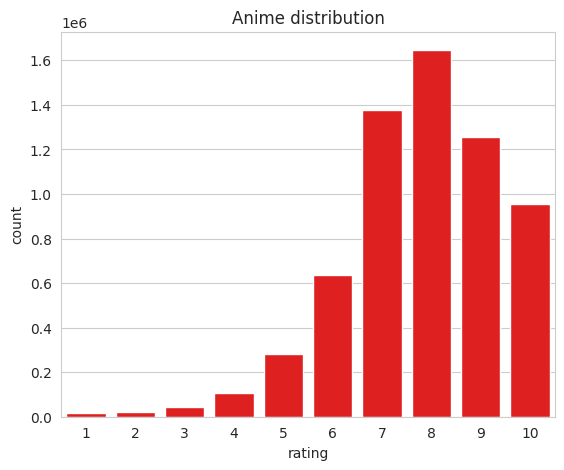

In [10]:
sns.set_style('whitegrid')
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
axis = sns.countplot(x="rating", data=rating_data, color = 'red')
plt.title('Anime distribution')

